# Multiple Linear Regression

## Importing the libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [19]:
dataset = pd.read_csv('drag_coef.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
print(X_train)

[[6.91e-01 2.39e+03]
 [8.95e-01 9.81e-02]
 [6.97e-01 4.60e+00]
 ...
 [7.68e-01 2.14e+02]
 [8.29e-01 1.17e+03]
 [7.96e-01 1.37e-01]]


In [22]:
print(len(X_train))

662


In [23]:
print(len(X_test))

166


## Training the Multiple Linear Regression model on the Training set

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

##Applying K fold Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: -4.09 %
Standard Deviation: 14.61 %


## Predicting the Test set results

In [26]:
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 8.15e+01  1.49e+00]
 [ 8.67e+01  2.20e+01]
 [ 8.53e+01  1.17e+01]
 [ 1.02e+02  6.23e+01]
 [ 8.20e+01  1.26e+00]
 [ 9.67e+01  1.92e+01]
 [ 8.66e+01  8.22e+01]
 [ 8.07e+01  2.24e+02]
 [ 7.63e+01  1.00e+00]
 [ 7.91e+01  5.26e+01]
 [ 9.03e+01  2.96e+02]
 [ 8.38e+01  6.92e+01]
 [ 5.61e+01  1.45e+00]
 [ 8.83e+01  1.07e+02]
 [ 7.70e+01  7.48e+01]
 [ 8.51e+01  5.42e+00]
 [ 1.02e+02  1.36e+01]
 [ 7.24e+01  1.03e+00]
 [ 8.53e+01  3.84e+00]
 [ 9.59e+01  2.69e+02]
 [ 8.26e+01  8.61e-01]
 [ 8.76e+01  6.20e+00]
 [ 1.02e+02  1.16e+02]
 [ 1.00e+02  5.61e+00]
 [ 8.66e+01  1.26e+01]
 [ 8.36e+01  1.44e+02]
 [ 8.51e+01  4.95e+00]
 [-6.03e+00  1.84e+00]
 [ 7.96e+01  1.29e+00]
 [ 8.80e+01  2.06e+00]
 [ 7.95e+01  8.64e-01]
 [ 7.87e+01  1.17e+00]
 [ 8.18e+01  7.14e+00]
 [ 7.65e+01  2.57e+00]
 [ 9.18e+01  1.12e+01]
 [ 8.90e+01  3.72e+01]
 [ 8.73e+01  2.56e+00]
 [ 8.19e+01  7.10e+01]
 [ 8.51e+01  3.12e+00]
 [ 8.41e+01  2.55e+01]
 [ 9.34e+01  5.73e+00]
 [ 9.08e+01  3.76e+01]
 [ 7.68e+01  1.18e+00]
 [ 9.08e+01

## Evaluating the Model Performance

In [27]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score  ", r2_score(y_train, y_pred_train))
print("Mean Squared Error  ", mean_squared_error(y_train, y_pred_train))

R2 Score:  -0.0009731737028904064
Mean Squared Error:  27678.08957304943
R2 Score   0.009275364045496892
Mean Squared Error   60747.28971663838


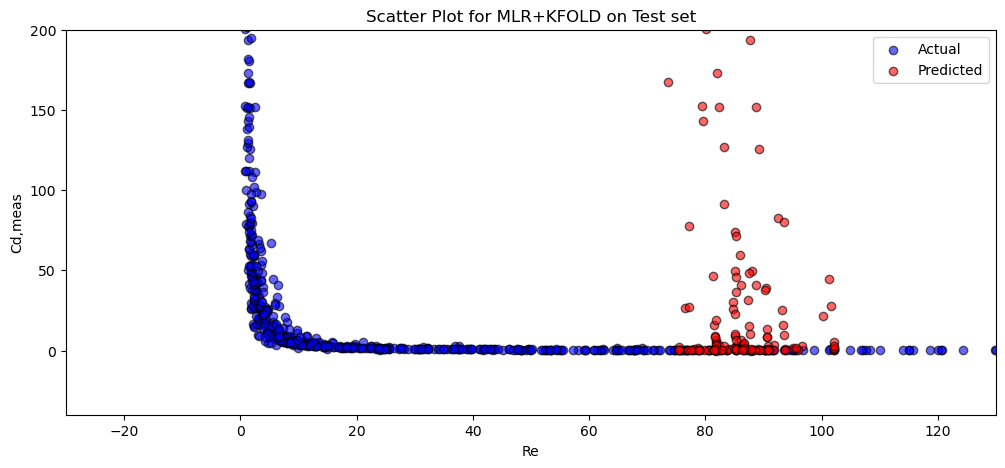

In [28]:
plt.figure(figsize=(12,5))
plt.scatter( y ,X[:,-1], c = 'blue'  , edgecolors='black', alpha=0.6,label = 'Actual')
plt.scatter( y_pred ,X_test[:,-1], c = 'red' ,edgecolors='black', alpha=0.6, label = 'Predicted')
##plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.ylim(-40, 200)
plt.xlim(-30, 130)
plt.title('Scatter Plot for MLR+KFOLD on Test set')
plt.ylabel('Cd,meas')
plt.xlabel('Re')
plt.legend()

In [29]:
print("R2 Score: ", r2_score(y_pred,X_test[:,-1]))

R2 Score:  -2543.968429306714


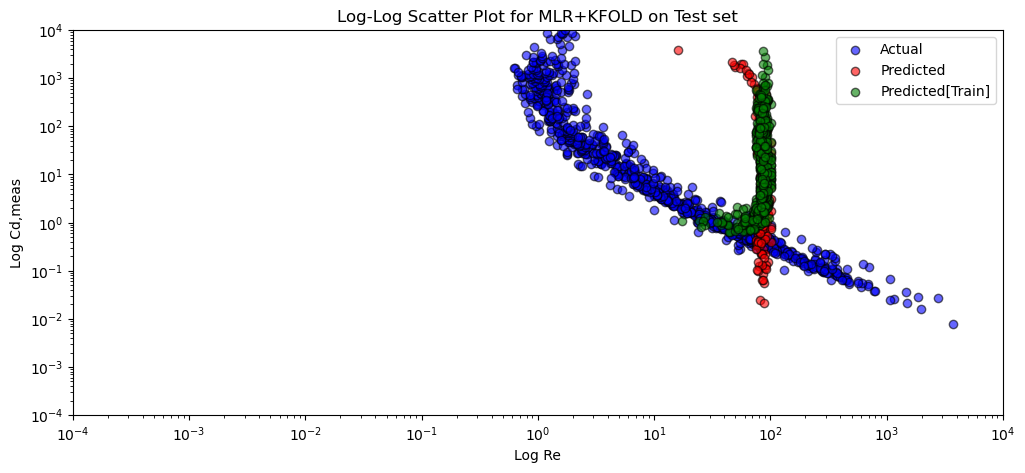

In [30]:
plt.figure(figsize=(12, 5))

plt.scatter(y, X[:,-1], c='blue', edgecolors='black', alpha=0.6,label='Actual')
plt.scatter(y_pred, X_test[:,-1], c='red',edgecolors='black', alpha=0.6, label='Predicted')
plt.scatter(y_pred_train,y_train, color='green',edgecolors='black', alpha=0.6, label='Predicted[Train]')

plt.xscale('log')
plt.yscale('log')

plt.ylim(0.0001, 10000)
plt.xlim(0.0001, 10000)

plt.title('Log-Log Scatter Plot for MLR+KFOLD on Test set')
plt.ylabel('Log Cd,meas')
plt.xlabel('Log Re')
plt.legend()

plt.show()

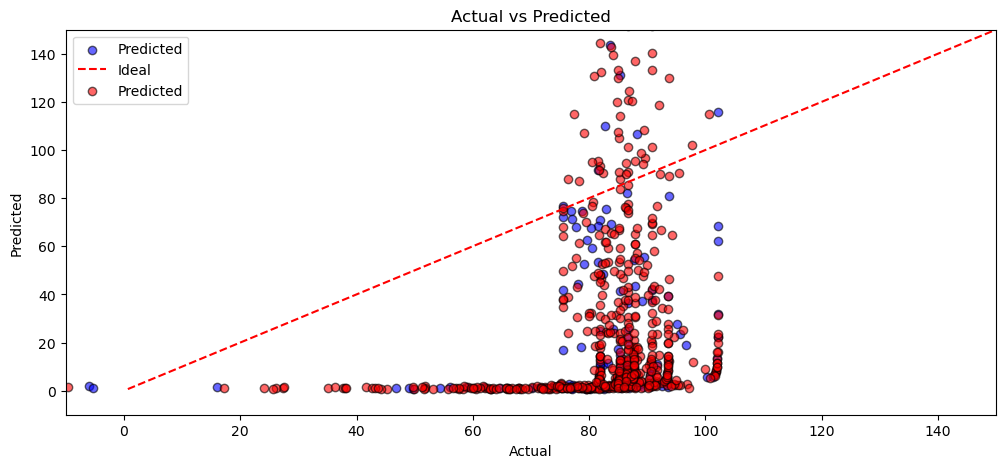

In [31]:
plt.figure(figsize=(12,5))
plt.scatter(y_pred,y_test, color='blue',edgecolors='black', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.scatter(y_pred_train,y_train, color='red',edgecolors='black', alpha=0.6, label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim(-10, 150)
plt.ylim(-10, 150)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

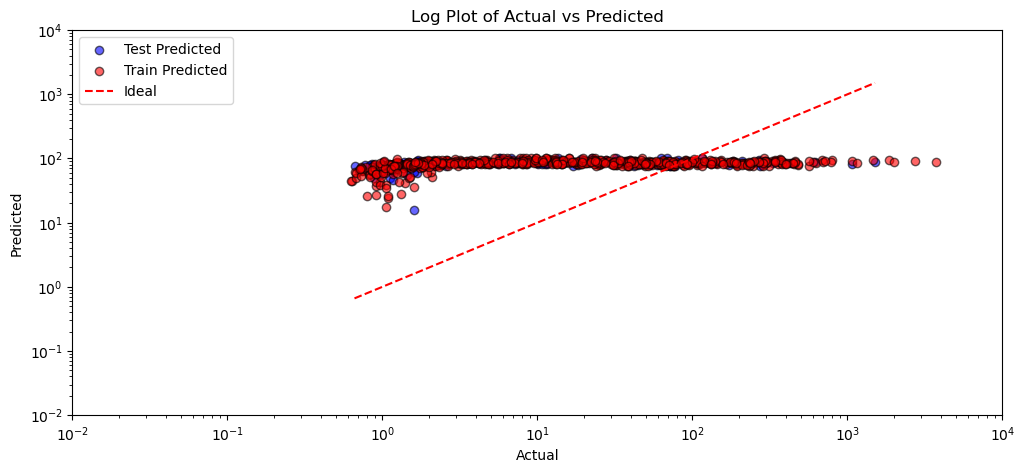

In [32]:
plt.figure(figsize=(12, 5))

plt.scatter(y_test, y_pred, color='blue', edgecolors='black', alpha=0.6,label='Test Predicted')
plt.scatter(y_train, y_pred_train, color='red',edgecolors='black', alpha=0.6, label='Train Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')

plt.xlim(0.01, 10000)
plt.ylim(0.01, 10000)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.title('Log Plot of Actual vs Predicted')
plt.legend()

##Plotting the Results on Test set

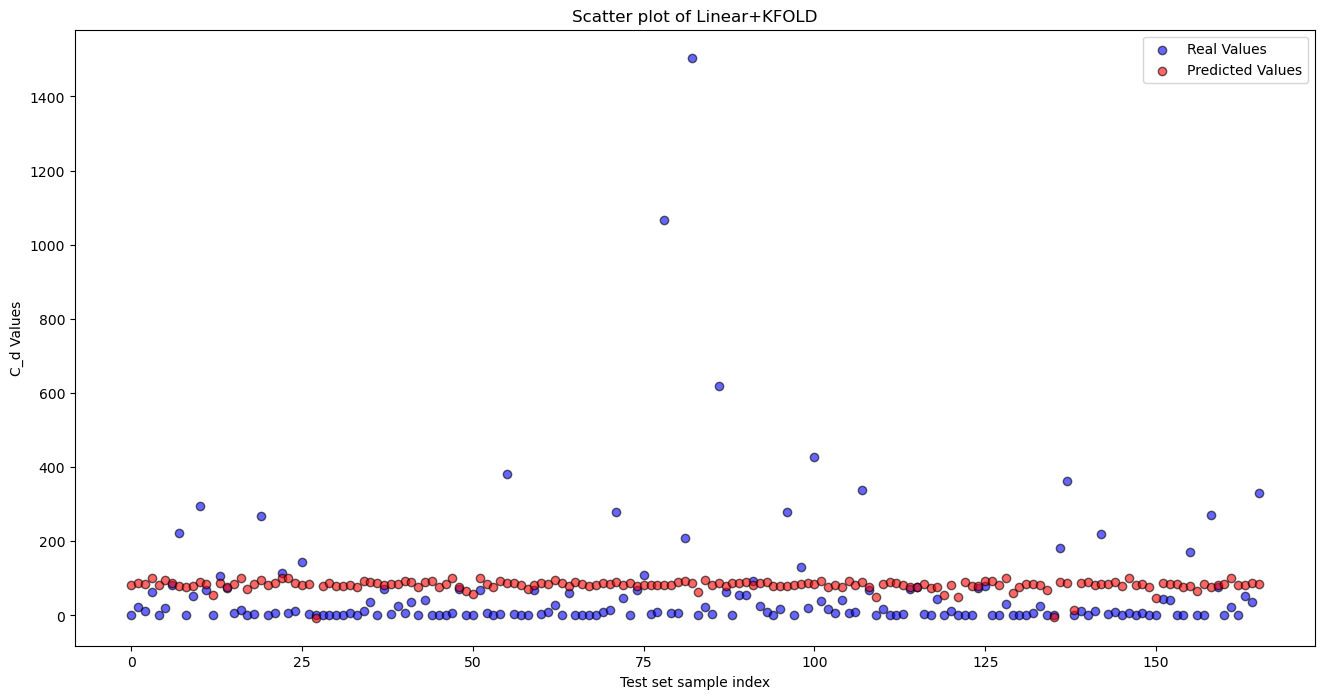

In [33]:
plt.figure(figsize=(16,8))
plt.scatter(range(len(y_test)), y_test, color = 'blue',edgecolors='black', alpha=0.6,label='Real Values')
plt.scatter(range(len(y_pred)), y_pred , color = 'red',edgecolors='black', alpha=0.6,label='Predicted Values')
plt.title('Scatter plot of Linear+KFOLD')
plt.xlabel('Test set sample index')
plt.ylabel('C_d Values')
plt.legend()
plt.show()

##Scatter plot for Trainset

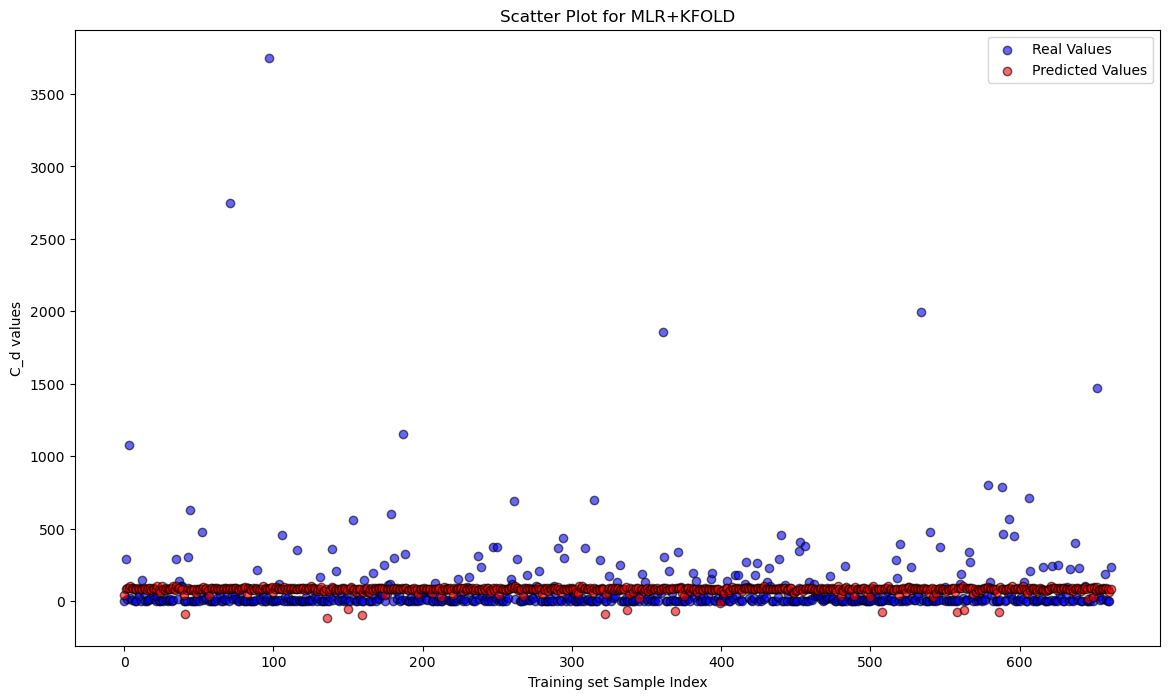

In [34]:
plt.figure(figsize=(14, 8))
plt.scatter(range(len(y_train)), y_train, color = 'blue',edgecolors='black', alpha=0.6,label='Real Values')
plt.scatter(range(len(y_pred_train)), y_pred_train , color = 'red',edgecolors='black', alpha=0.6,label='Predicted Values')
plt.title('Scatter Plot for MLR+KFOLD')
plt.xlabel('Training set Sample Index')
plt.ylabel('C_d values')
plt.legend()
plt.show()